<a href="https://colab.research.google.com/github/Nusnan-AM/Research_models/blob/main/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packges

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 16.pptx
'2021-01-29 09_38_00.696+0530.jpg'
 20210225_172625.heic
 20210225_172629.heic
 20210508_133429.heic
 2022-08-03-13-29-54-585.jpg
 20230808_120102.heic
'2ND YR'
 3.2.PAP
 5_6064325326090012166.pdf
 5_6064325326090012169.pdf
 987262370v.pdf
'App2951 (1).pdf'
 App2951.pdf
 App2953.pdf
 App2954.pdf
'BOCDownload_26_4_20239_9_28 (1).pdf'
'Campus sylabus'
 catboost_info
'c group project'
'check list for student -.docx'
 CITEc
'Class Note 01 - Programming Fundamentals CMJD104 (1).gdoc'
'Class Note 01 - Programming Fundamentals CMJD104.gdoc'
'Class Note 02 - Programming Fundamentals.gdoc'
'Class Note 03 - Programming Fundamentals.gdoc'
'Class Note 04 - Programming Fundamentals.gdoc'
'Class Note 05 - Programming Fundamentals (1).gdoc'
'Class Note 05 - Programming Fundamentals.gdoc'
'Class note 3 (Arrays_Day 02).gdoc'
'Class Note - PRF (Arrays) (1).gdoc'
 Classroom
'CMJD Class Note 01 - Object Oriented Programming (1).gdoc'
'CMJD Class Note 01 - Object Oriente

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv("jartest.csv")
data.isnull()

,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5101,False,False,False,False,False,False,False,False,False,False
5102,False,False,False,False,False,False,False,False,False,False
5103,False,False,False,False,False,False,False,False,False,False
5104,False,False,False,False,False,False,False,False,False,False


# Features

In [ ]:
X = data[['Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

In [ ]:
X_train, X_test, y_turbidity_train, y_turbidity_test = train_test_split(X, y_turbidity, test_size=0.2, random_state=42)
_, _, y_ph_train, y_ph_test = train_test_split(X, y_ph, test_size=0.2, random_state=42)
_, _, y_colour_train, y_colour_test = train_test_split(X, y_colour, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input (samples, features, channels)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Model Development and pridictions

In [ ]:
# Define the MTC-CNN model
def build_mtc_cnn():
    input_layer = Input(shape=(X_train.shape[1], 1))

    # Shared convolutional layers
    x = Conv1D(32, kernel_size=2, activation='relu')(input_layer)
    x = MaxPooling1D(pool_size=1)(x)  # Adjusted pool size to prevent negative dimensions
    x = Dropout(0.2)(x)
    x = Conv1D(64, kernel_size=2, activation='relu')(x)
    x = Flatten()(x)  # Removed second pooling to avoid dimension reduction to 0

    # Task-specific branches
    turbidity_branch = Dense(64, activation='relu')(x)
    turbidity_output = Dense(1, activation='linear', name='Turbidity')(turbidity_branch)

    ph_branch = Dense(64, activation='relu')(x)
    ph_output = Dense(1, activation='linear', name='PH')(ph_branch)

    colour_branch = Dense(64, activation='relu')(x)
    colour_output = Dense(1, activation='linear', name='Colour')(colour_branch)

    # Define the model
    model = Model(inputs=input_layer, outputs=[turbidity_output, ph_output, colour_output])
    model.compile(optimizer='adam',
                  loss={'Turbidity': 'mse', 'PH': 'mse', 'Colour': 'mse'},
                  metrics={'Turbidity': 'mae', 'PH': 'mae', 'Colour': 'mae'})
    return model

# Build and train the model
model = build_mtc_cnn()

history = model.fit(
    X_train,
    {'Turbidity': y_turbidity_train, 'PH': y_ph_train, 'Colour': y_colour_train},
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)



Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - Colour_loss: 384.4222 - Colour_mae: 38.0359 - PH_loss: 26.7207 - PH_mae: 4.5087 - Turbidity_loss: 3452.2227 - Turbidity_mae: 16.7011 - loss: 3863.8350 - val_Colour_loss: 162.2261 - val_Colour_mae: 28.7169 - val_PH_loss: 2.6959 - val_PH_mae: 1.1498 - val_Turbidity_loss: 1886.9989 - val_Turbidity_mae: 24.7479 - val_loss: 2034.2172
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Colour_loss: 245.2204 - Colour_mae: 29.4747 - PH_loss: 2.4002 - PH_mae: 1.1619 - Turbidity_loss: 2034.4943 - Turbidity_mae: 28.0289 - loss: 2282.2749 - val_Colour_loss: 146.1331 - val_Colour_mae: 29.6489 - val_PH_loss: 1.7686 - val_PH_mae: 0.9719 - val_Turbidity_loss: 1835.8085 - val_Turbidity_mae: 27.9525 - val_loss: 1966.0212
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Colour_loss: 246.8134 - Colour_mae: 29.5414 - PH_loss: 1.8630 - PH_mae: 1.0429 - Turbidity_loss: 2072.4250 - Turbidity_mae: 28.3641 - loss: 2321.2947 - val_Colour_loss: 144.4

In [ ]:
# Evaluate the model
evaluation_results = model.evaluate(
    X_test,
    {'Turbidity': y_turbidity_test, 'PH': y_ph_test, 'Colour': y_colour_test},
    verbose=0
)

# Access the results by index
loss = evaluation_results[0]  # Total loss
turbidity_loss = evaluation_results[1]  # Turbidity loss
ph_loss = evaluation_results[2]  # PH loss
colour_loss = evaluation_results[3]  # Colour loss
turbidity_mae = evaluation_results[4]  # Turbidity MAE
ph_mae = evaluation_results[5]  # PH MAE
colour_mae = evaluation_results[6]  # Colour MAE

print("\nModel Evaluation:")
print(f"Total Loss: {loss:.2f}")
print(f"Turbidity MAE: {turbidity_mae:.2f}")
print(f"PH MAE: {ph_mae:.2f}")
print(f"Colour MAE: {colour_mae:.2f}")


Model Evaluation:
Total Loss: 2073.18
Turbidity MAE: 31.14
PH MAE: 0.15
Colour MAE: 26.13


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step

Model Evaluation with R² Values:
Total Loss: 2073.18
Turbidity MAE: 31.14 | R²: -6.36
PH MAE: 0.15 | R²: 0.50
Colour MAE: 26.13 | R²: -0.31


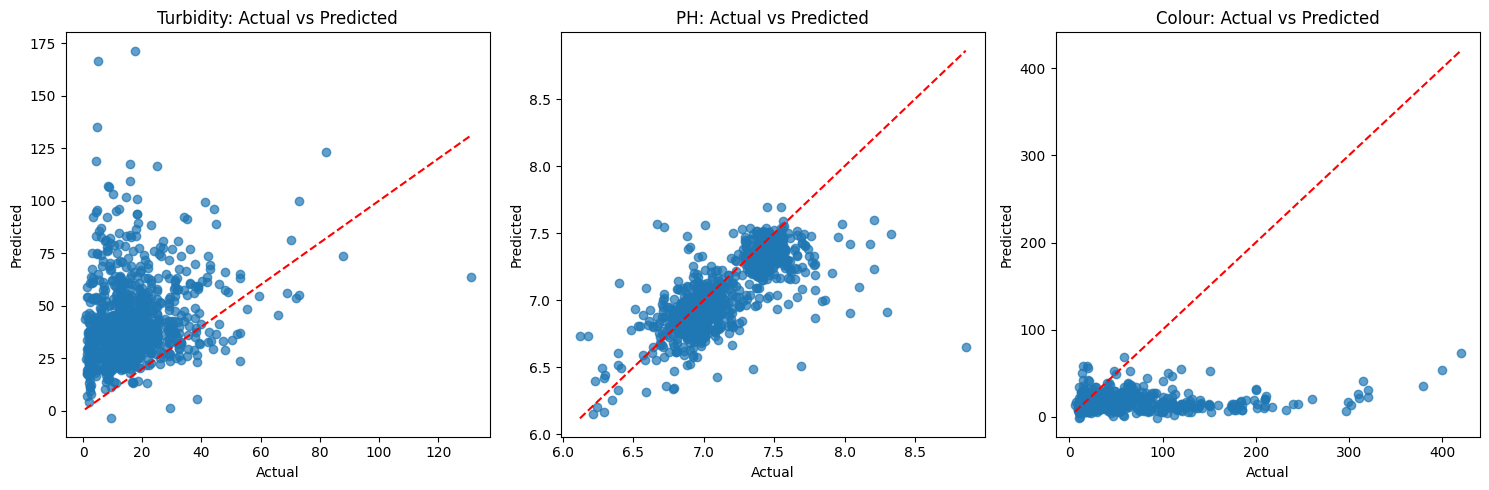

In [ ]:
# Predict on the test set
y_turbidity_pred, y_ph_pred, y_colour_pred = model.predict(X_test)

# Compute R² values
r2_turbidity = r2_score(y_turbidity_test, y_turbidity_pred)
r2_ph = r2_score(y_ph_test, y_ph_pred)
r2_colour = r2_score(y_colour_test, y_colour_pred)

# Print R² values along with other metrics
print("\nModel Evaluation with R² Values:")
print(f"Total Loss: {loss:.2f}")
print(f"Turbidity MAE: {turbidity_mae:.2f} | R²: {r2_turbidity:.2f}")
print(f"PH MAE: {ph_mae:.2f} | R²: {r2_ph:.2f}")
print(f"Colour MAE: {colour_mae:.2f} | R²: {r2_colour:.2f}")

# Optional: Plot predictions vs. actuals for visual evaluation
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot for Turbidity
plt.subplot(1, 3, 1)
plt.scatter(y_turbidity_test, y_turbidity_pred, alpha=0.7)
plt.plot([min(y_turbidity_test), max(y_turbidity_test)],
         [min(y_turbidity_test), max(y_turbidity_test)], 'r--')
plt.title('Turbidity: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for PH
plt.subplot(1, 3, 2)
plt.scatter(y_ph_test, y_ph_pred, alpha=0.7)
plt.plot([min(y_ph_test), max(y_ph_test)],
         [min(y_ph_test), max(y_ph_test)], 'r--')
plt.title('PH: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Colour
plt.subplot(1, 3, 3)
plt.scatter(y_colour_test, y_colour_pred, alpha=0.7)
plt.plot([min(y_colour_test), max(y_colour_test)],
         [min(y_colour_test), max(y_colour_test)], 'r--')
plt.title('Colour: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


Enter the following feature values:
Raw Turbidity: 90.4
Raw PH: 7.07
Raw Colour: 500
PAC: 2.5
KMnO4: 0.4
ACD: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Predicted Values:
Turbidity: 54.48
PH: 7.04
Colour: 24.86


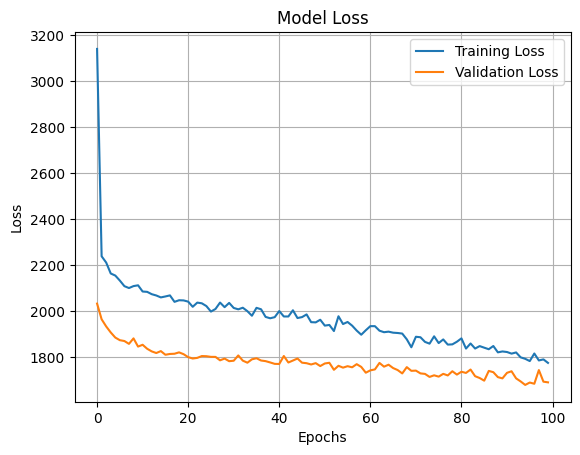

In [ ]:
# Function to predict from user input
def predict_from_input():
    print("\nEnter the following feature values:")
    raw_turbidity = float(input("Raw Turbidity: "))
    raw_ph = float(input("Raw PH: "))
    raw_colour = float(input("Raw Colour: "))
    pac = float(input("PAC: "))
    kmno4 = float(input("KMnO4: "))
    acd = float(input("ACD: "))

    # Combine inputs into a DataFrame
    input_data = np.array([[raw_turbidity, raw_ph, raw_colour, pac, kmno4, acd]])
    input_data = scaler.transform(input_data)
    input_data = input_data[..., np.newaxis]  # Reshape for CNN

    # Make predictions
    turbidity_pred, ph_pred, colour_pred = model.predict(input_data)

    # Display predictions
    print("\nPredicted Values:")
    print(f"Turbidity: {turbidity_pred[0][0]:.2f}")
    print(f"PH: {ph_pred[0][0]:.2f}")
    print(f"Colour: {colour_pred[0][0]:.2f}")

# Call the function to test
predict_from_input()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()